# Importing the important Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split


# Data Collection And Processing

In [4]:
# loading the  data from csv file to pandas dataframe
df=pd.read_csv('Sleep_health_dataset.csv')

In [6]:
# inspecting the first rows 
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:

df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [17]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [15]:

df.shape 

(374, 13)

In [19]:
df.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [35]:
df.isnull().sum().sum()

219

In [75]:
df=df.set_index('Person ID')
df.head()

,index,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [81]:
df.iloc[  0:4, 0:4]                 # for accesing particular column or row

,index,Gender,Age,Occupation
Person ID,,,,
1,0,Male,27,Software Engineer
2,1,Male,28,Doctor
3,2,Male,28,Doctor
4,3,Male,28,Sales Representative


In [89]:
df.sort_values('Quality of Sleep',ascending=False)
df.head()

,index,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,,
1,0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [97]:
df.Age.unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
      dtype=int64)

In [49]:
df.duplicated

<bound method DataFrame.duplicated of      Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42          

# spilting Data into x and y

In [38]:
X= df.drop(['Sleep Disorder'],axis=1)
y=df['Sleep Disorder']

In [42]:
X

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


In [46]:
y

0              NaN
1              NaN
2              NaN
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object

# Spilting data

In [53]:
from sklearn.model_selection import train_test_split

In [61]:
train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [59]:

print('x_train',X_train)


x_train      Person ID  Gender  Age Occupation  Sleep Duration  Quality of Sleep  \
36          37    Male   31     Doctor             6.1                 6   
158        159    Male   39     Lawyer             7.2                 8   
183        184    Male   42     Lawyer             7.8                 8   
168        169    Male   41     Lawyer             7.1                 7   
302        303  Female   51      Nurse             7.1                 7   
..         ...     ...  ...        ...             ...               ...   
71          72    Male   33     Doctor             6.1                 6   
106        107  Female   37      Nurse             6.1                 6   
270        271  Female   49      Nurse             6.1                 6   
348        349  Female   57      Nurse             8.2                 9   
102        103  Female   36    Teacher             7.2                 8   

     Physical Activity Level  Stress Level   BMI Category Blood Pressure  \
36 

In [63]:
print('x shape of x_train',X_train.shape)
print('y shape of y_train',y_train.shape)
print('x shape of x_test',X_test.shape)
print('y shape of y_test',y_test.shape)


x shape of x_train (261, 12)
y shape of y_train (261,)
x shape of x_test (113, 12)
y shape of y_test (113,)


<BarContainer object of 5 artists>

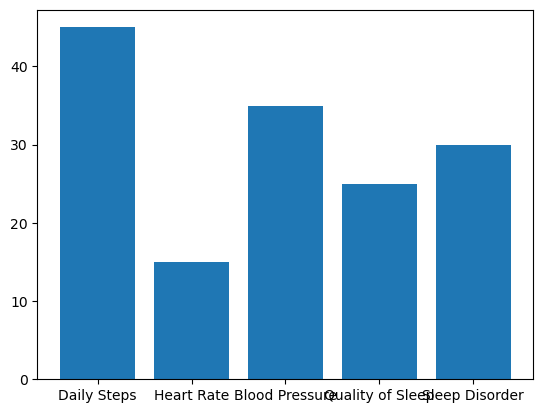

In [107]:
import matplotlib.pyplot as plt
Class=["Daily Steps",'Heart Rate','Blood Pressure','Quality of Sleep','Sleep Disorder']
class1_students=[45,15,35,25,30]
plt.bar(Class,class1_students)